In [3]:
%matplotlib nbagg
import atomap.api as am
import numpy as np
import atomap.dummy_data as dummy_data

<IPython.core.display.Javascript object>


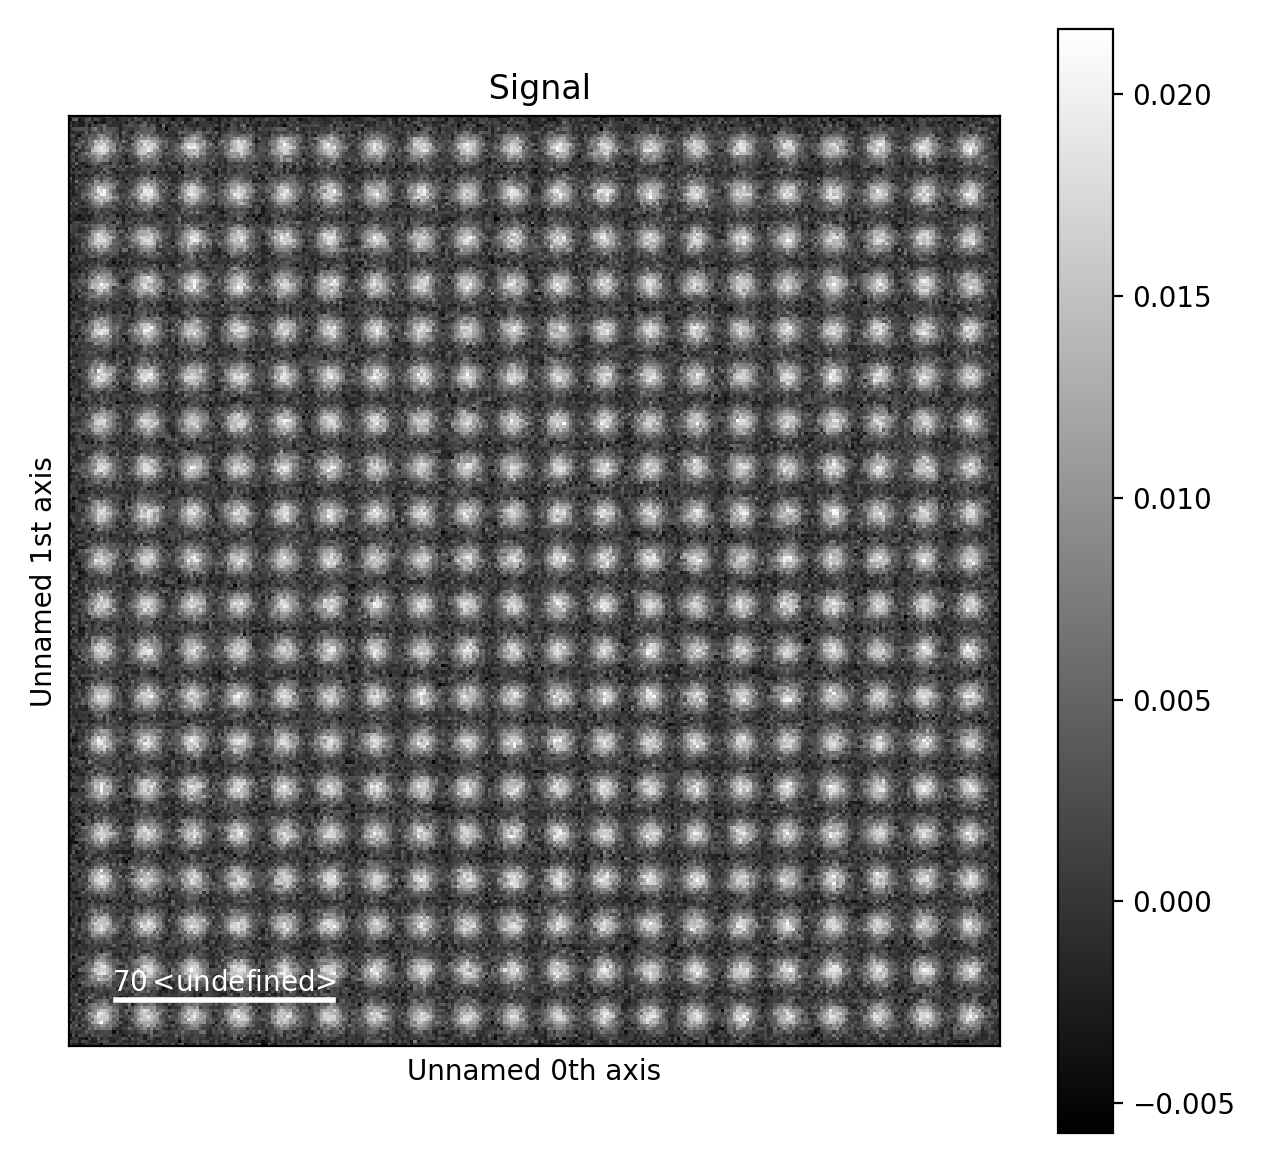

100%|██████████| 400/400 [00:00<00:00, 6831.42it/s]


In [7]:
s = dummy_data.get_simple_cubic_signal(image_noise=True)
s.plot()


100%|██████████| 400/400 [00:00<00:00, 7189.81it/s]


<IPython.core.display.Javascript object>


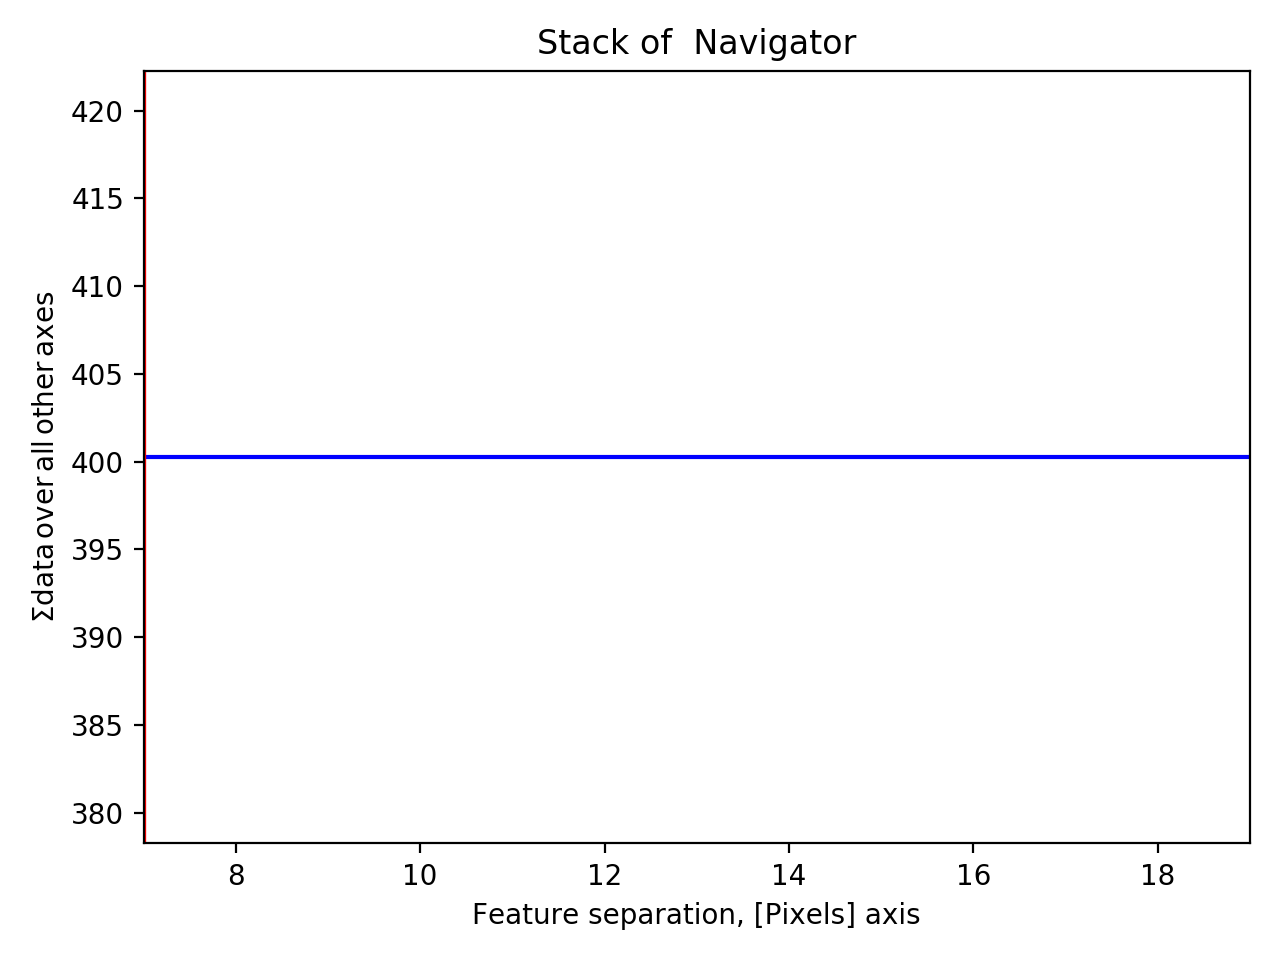

<IPython.core.display.Javascript object>


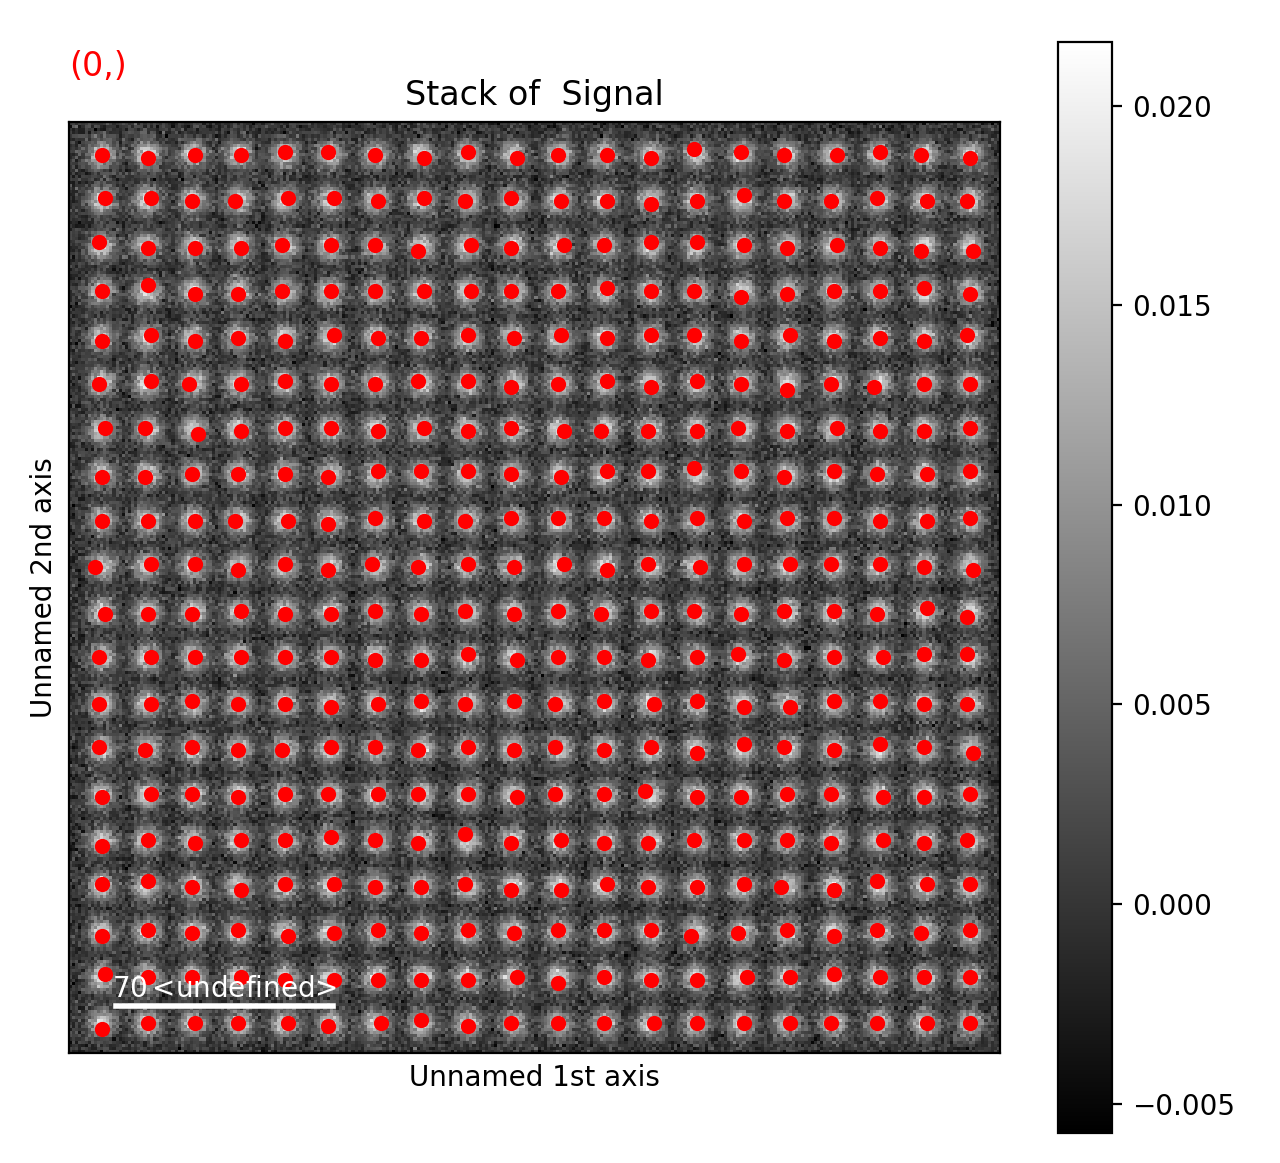

In [8]:
s_peaks = am.get_feature_separation(s, separation_range=(7, 20))
s_peaks.plot()

In [10]:
atom_positions = am.get_atom_positions(s, separation=7)
sublattice = am.Sublattice(atom_positions, image=s.data)
sublattice

<Sublattice,  (atoms:400,planes:0)>

In [11]:
sublattice.find_nearest_neighbors()
sublattice.refine_atom_positions_using_center_of_mass()
sublattice.refine_atom_positions_using_2d_gaussian()

Gaussian fitting: 100%|██████████| 400/400 [00:06<00:00, 64.57it/s]


100%|██████████| 400/400 [00:00<00:00, 7826.87it/s]


<IPython.core.display.Javascript object>


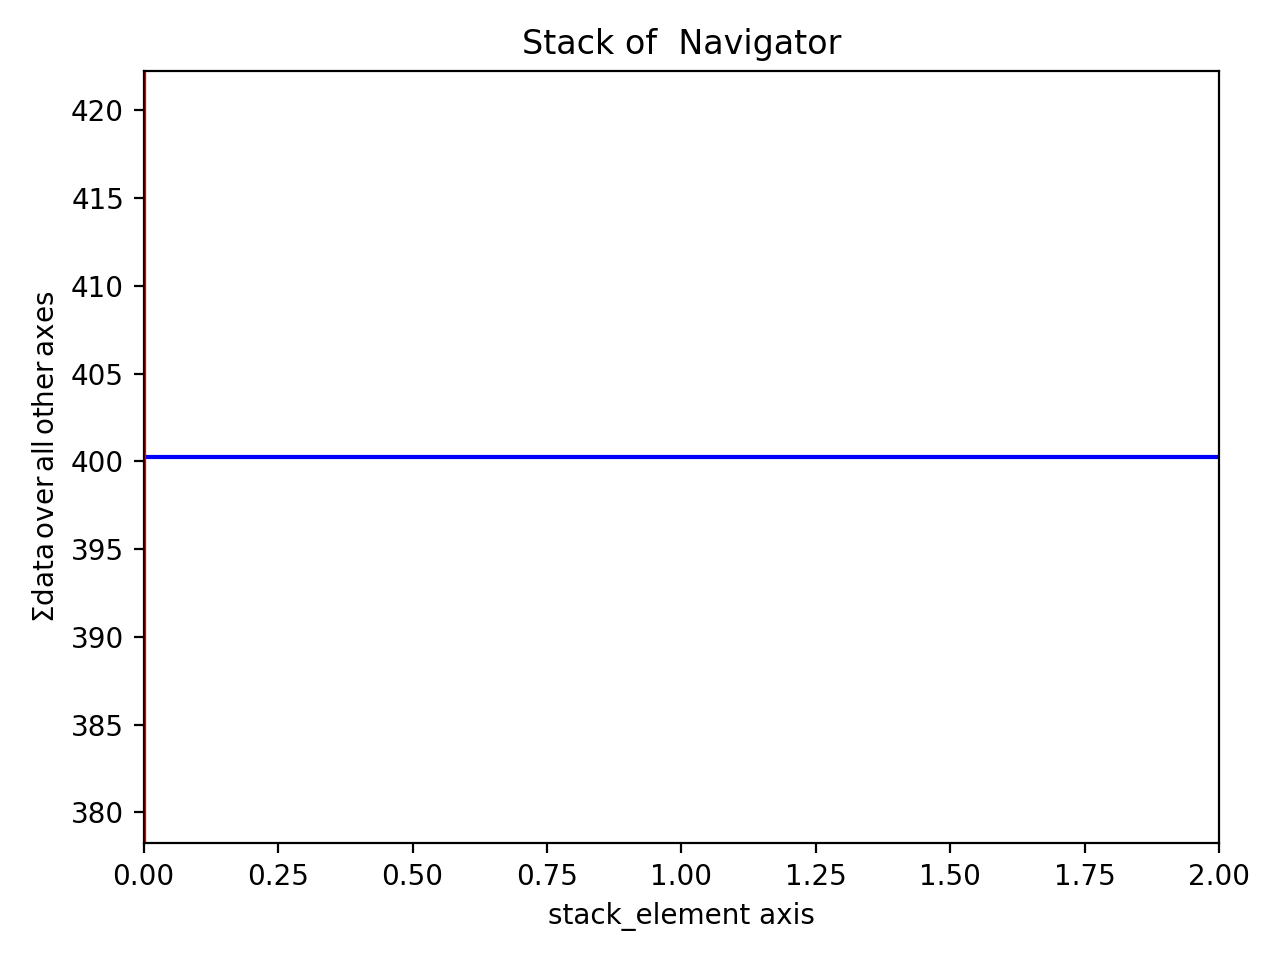

<IPython.core.display.Javascript object>


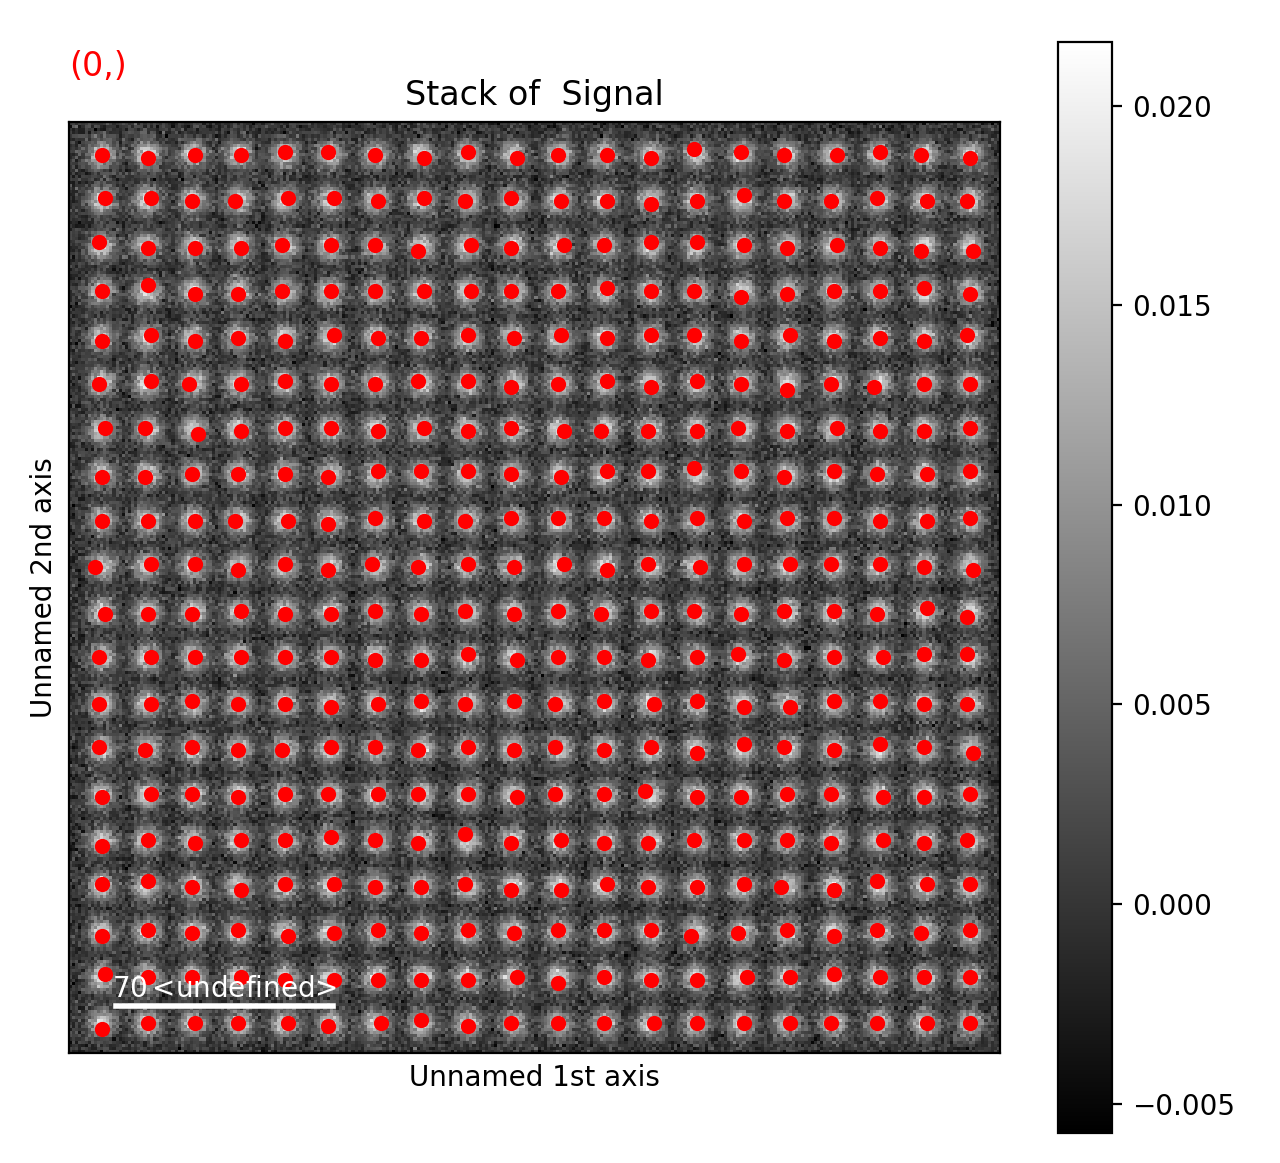

In [12]:
sublattice.get_position_history().plot()

In [13]:
atom_list = sublattice.atom_list
atom_list[0] 

<Atom_Position,  (x:10.1,y:290.0,sx:3.1,sy:3.3,r:2.6,e:1.1)>

<IPython.core.display.Javascript object>


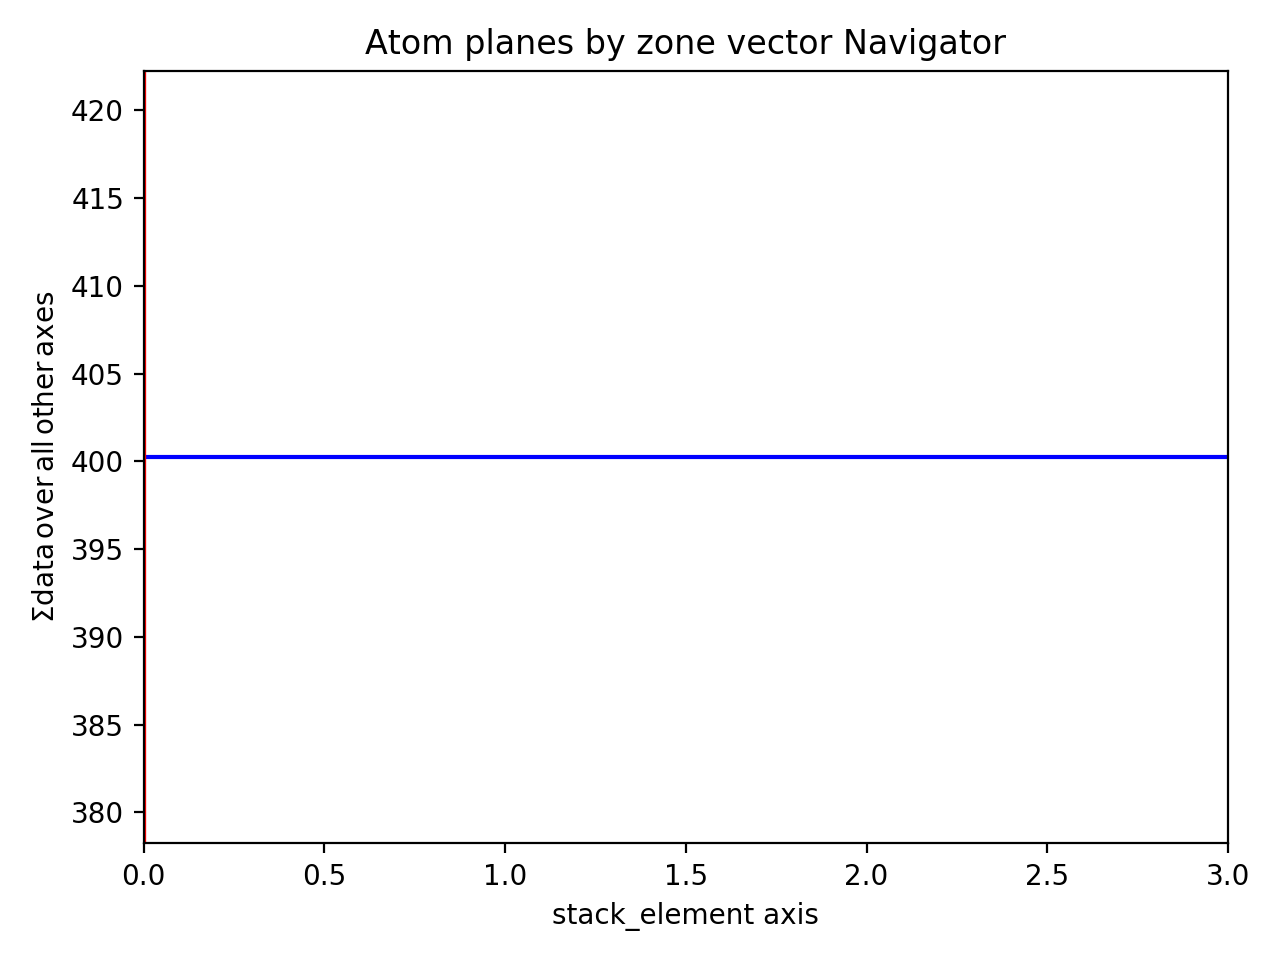

<IPython.core.display.Javascript object>


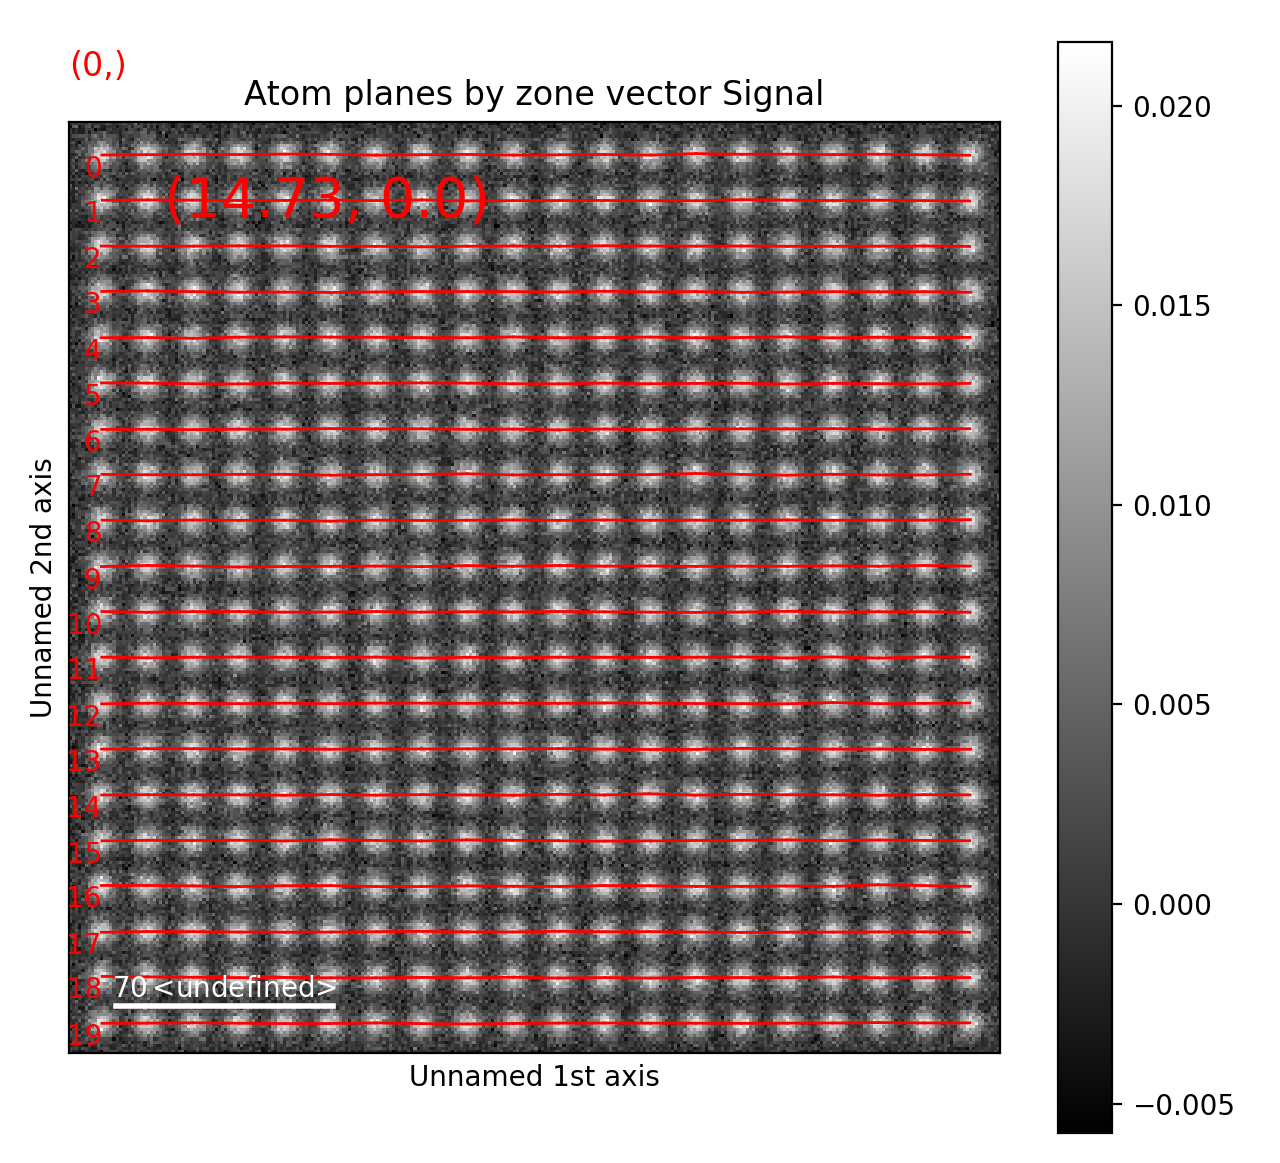

In [15]:
sublattice.construct_zone_axes()
sublattice.plot_planes()

In [16]:
>>> import atomap.api as am
>>> s = am.dummy_data.get_atom_counting_signal()
>>> atom_positions = am.get_atom_positions(s, 8, threshold_rel=0.1)
>>> sublattice = am.Sublattice(atom_positions, s)
>>> sublattice.construct_zone_axes()
>>> sublattice.refine_atom_positions_using_2d_gaussian()

Gaussian fitting: 100%|██████████| 156/156 [00:02<00:00, 72.66it/s]


<IPython.core.display.Javascript object>


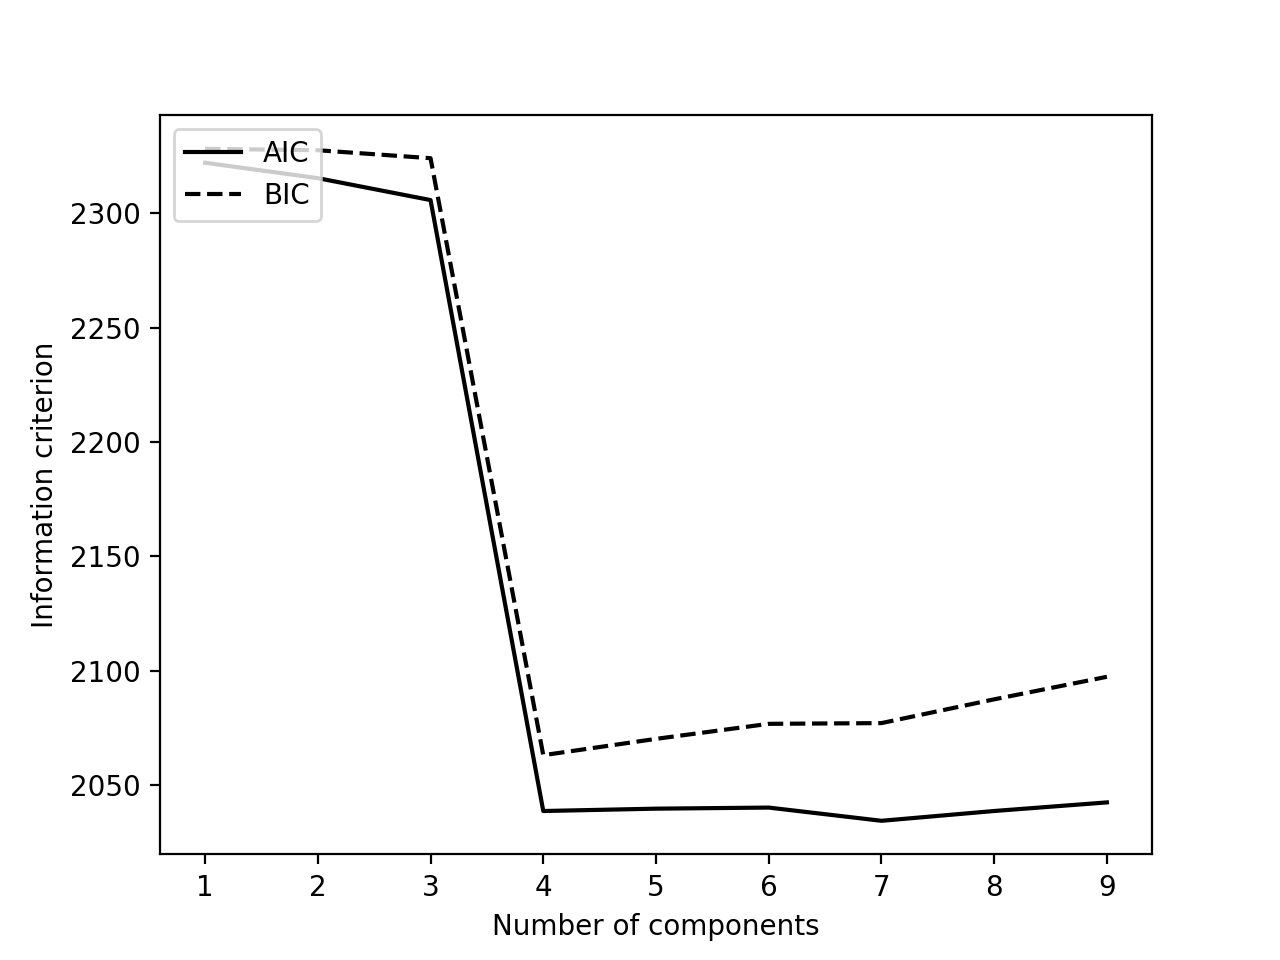

In [17]:
>>> models = am.quant.get_statistical_quant_criteria([sublattice], 10)


<IPython.core.display.Javascript object>


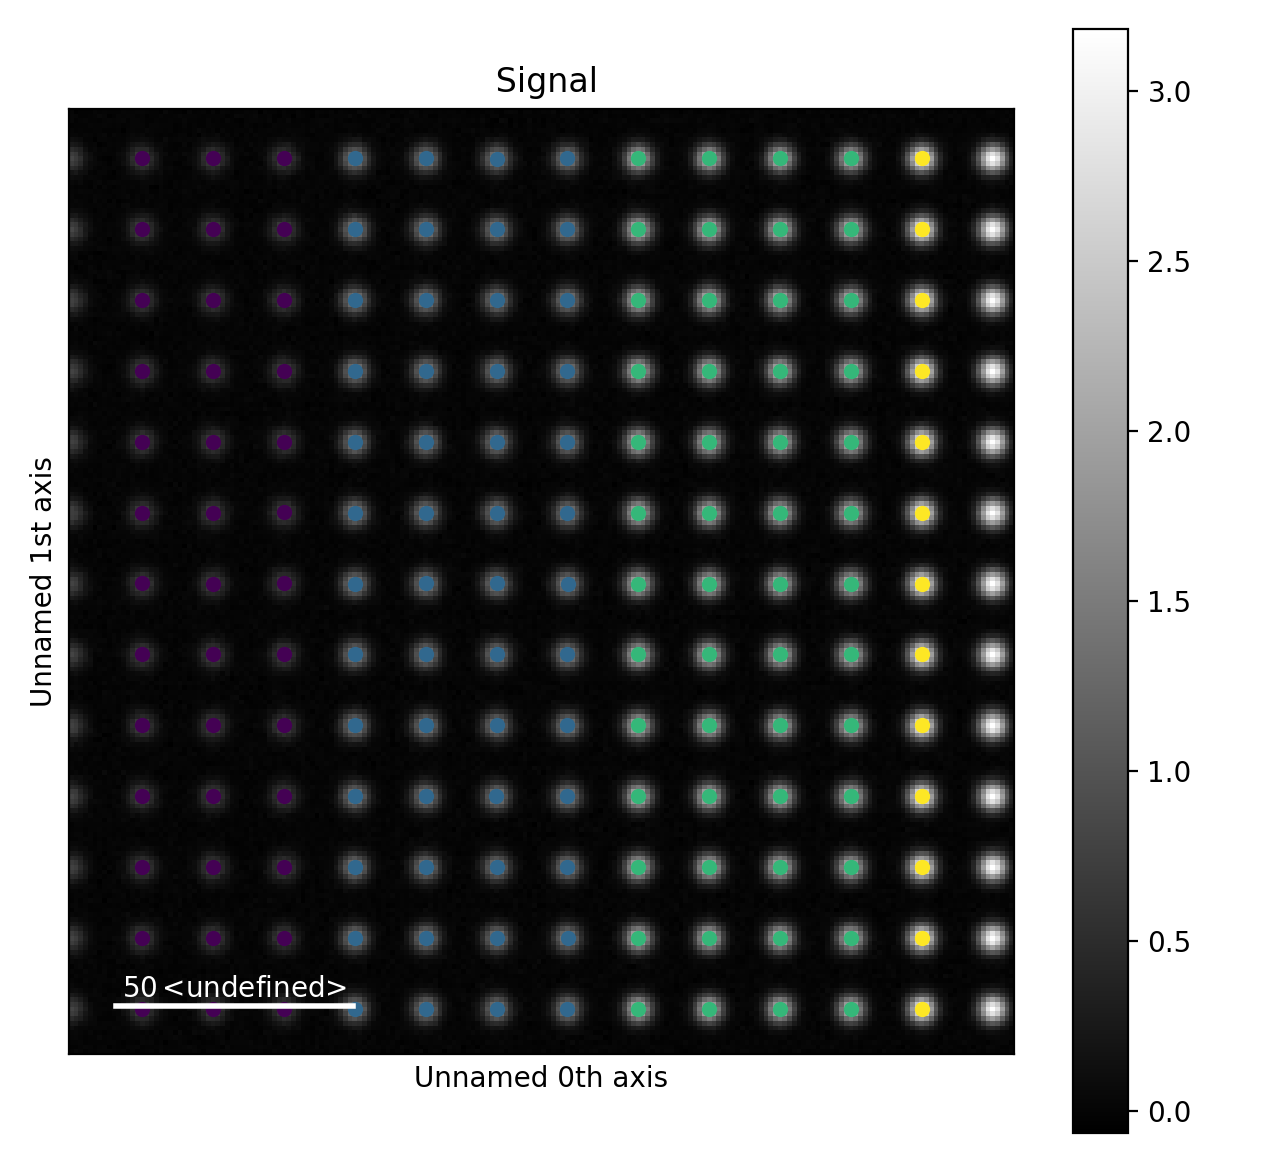

<IPython.core.display.Javascript object>


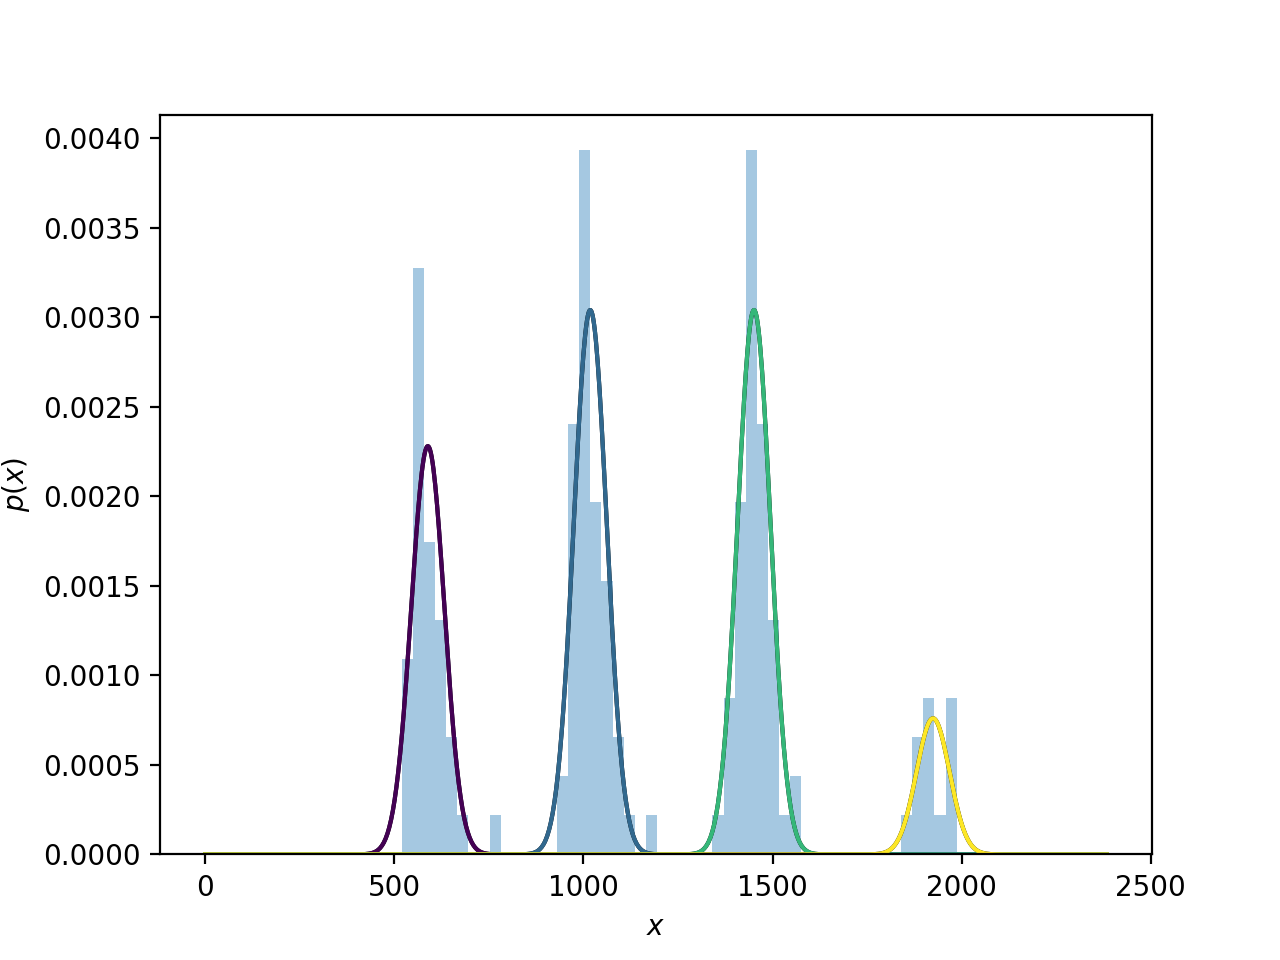

In [18]:
>>> model = models[3] # 4th model
>>> atom_lattice = am.quant.statistical_quant(sublattice.image, sublattice, model, 4)

Integrating: 100%|██████████| 156/156 [00:02<00:00, 65.98it/s]


<IPython.core.display.Javascript object>


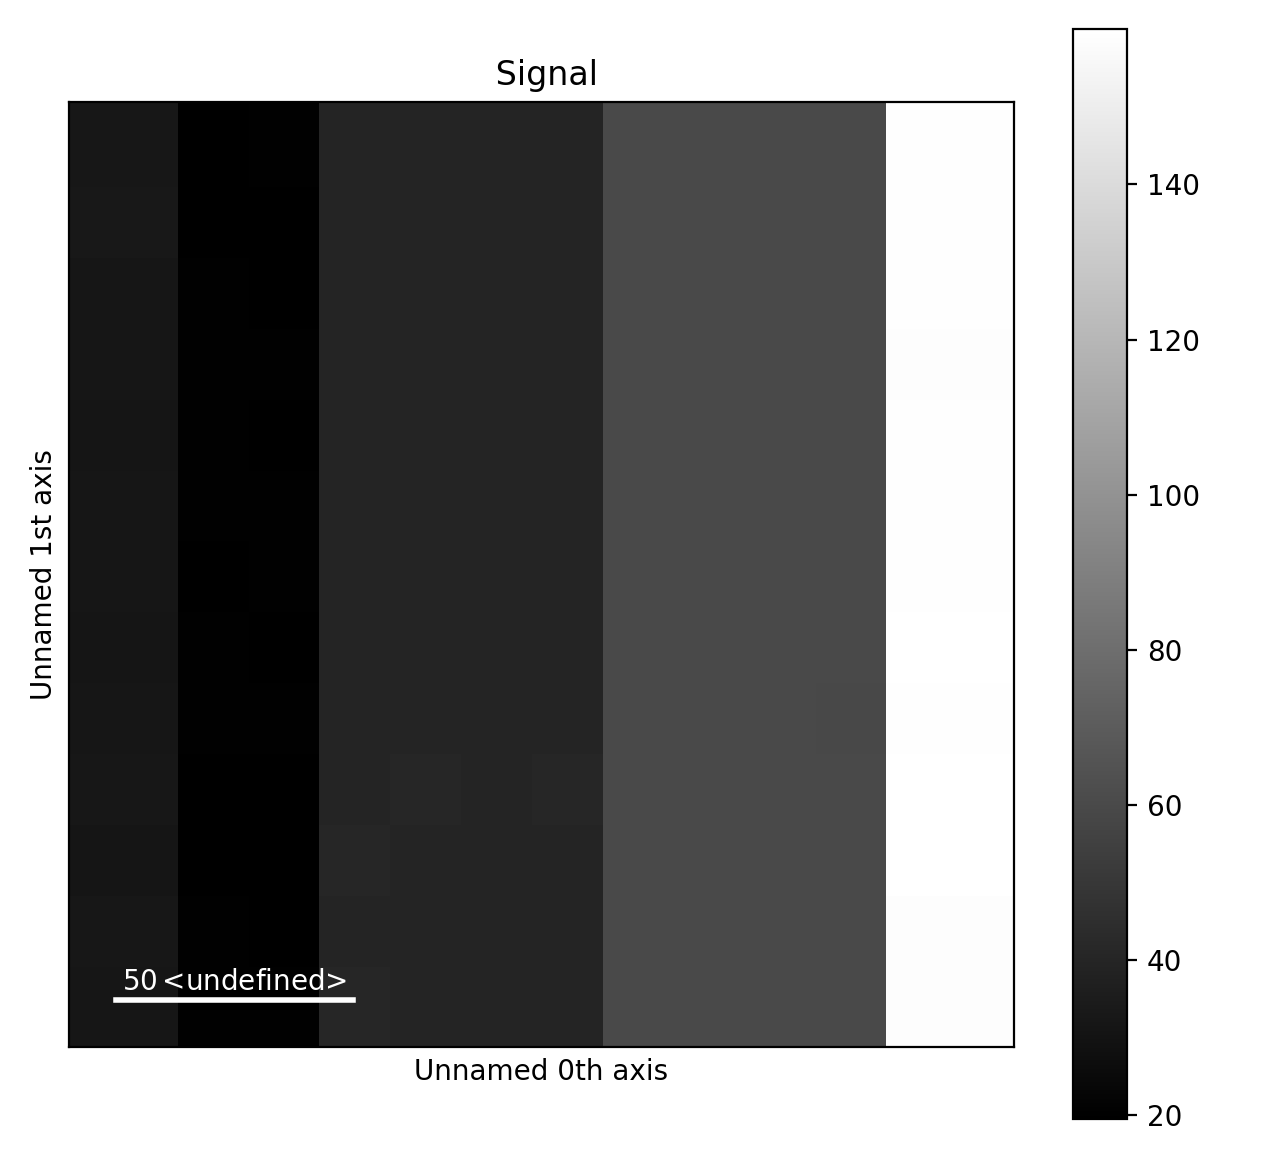

In [19]:
>>> i_points, i_record, p_record = atom_lattice.integrate_column_intensity()
>>> i_record.plot()

Integrating: 100%|██████████| 156/156 [00:02<00:00, 61.90it/s]


<IPython.core.display.Javascript object>


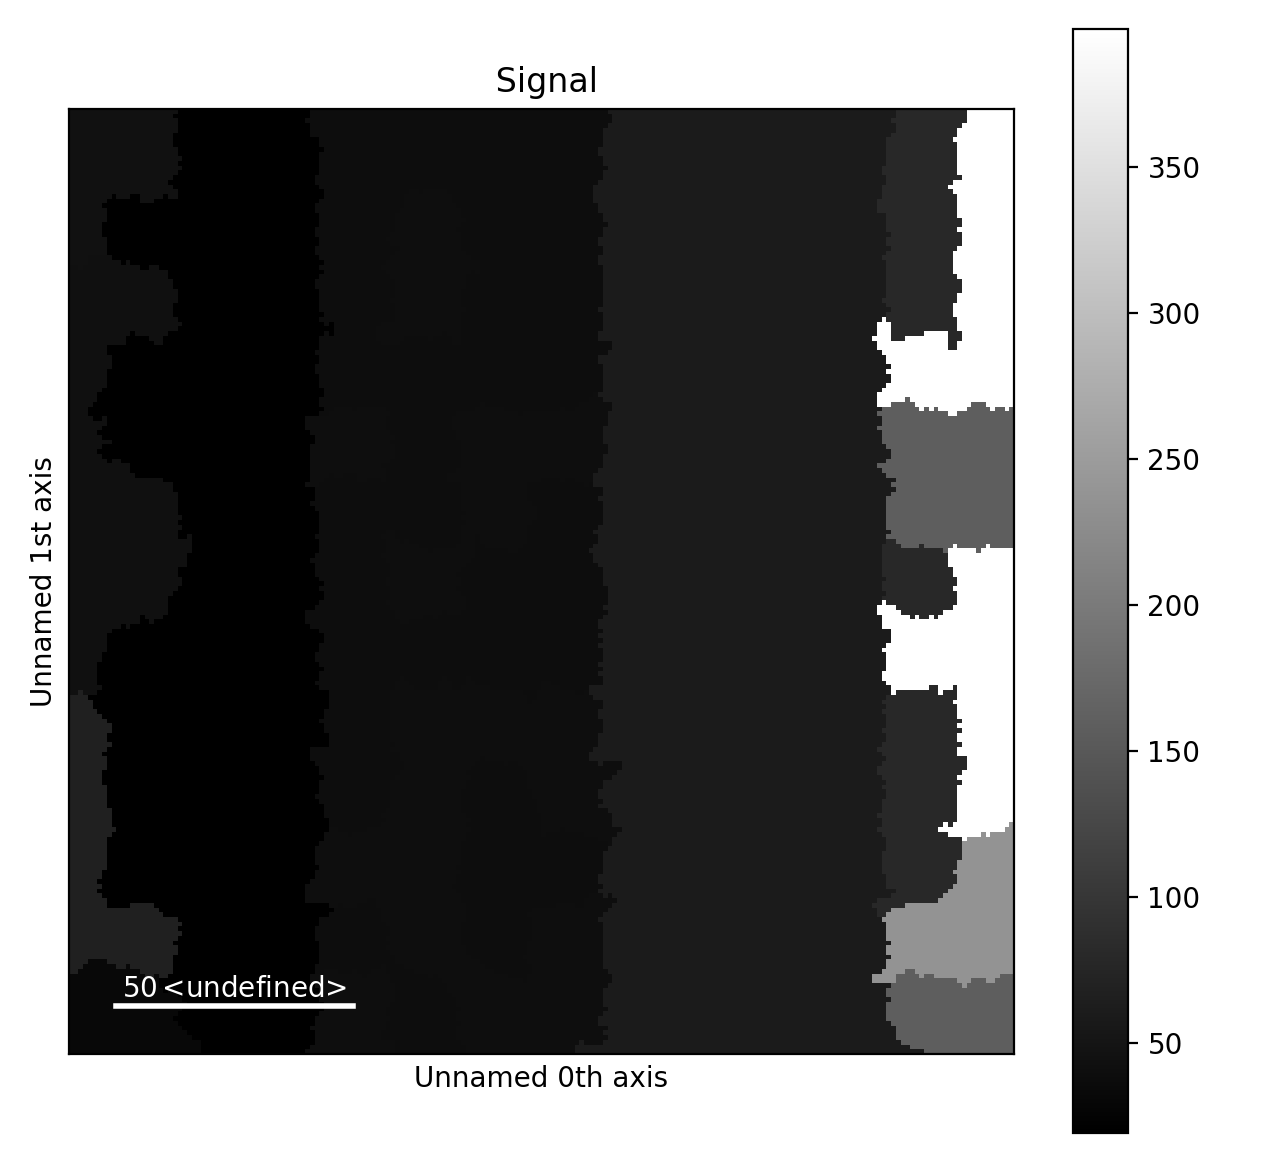

In [20]:
>>> i_points, i_record, p_record = atom_lattice.integrate_column_intensity(
...         method='Watershed')
>>> i_record.plot()

Gaussian fitting: 100%|██████████| 104/104 [00:02<00:00, 49.46it/s]


<IPython.core.display.Javascript object>


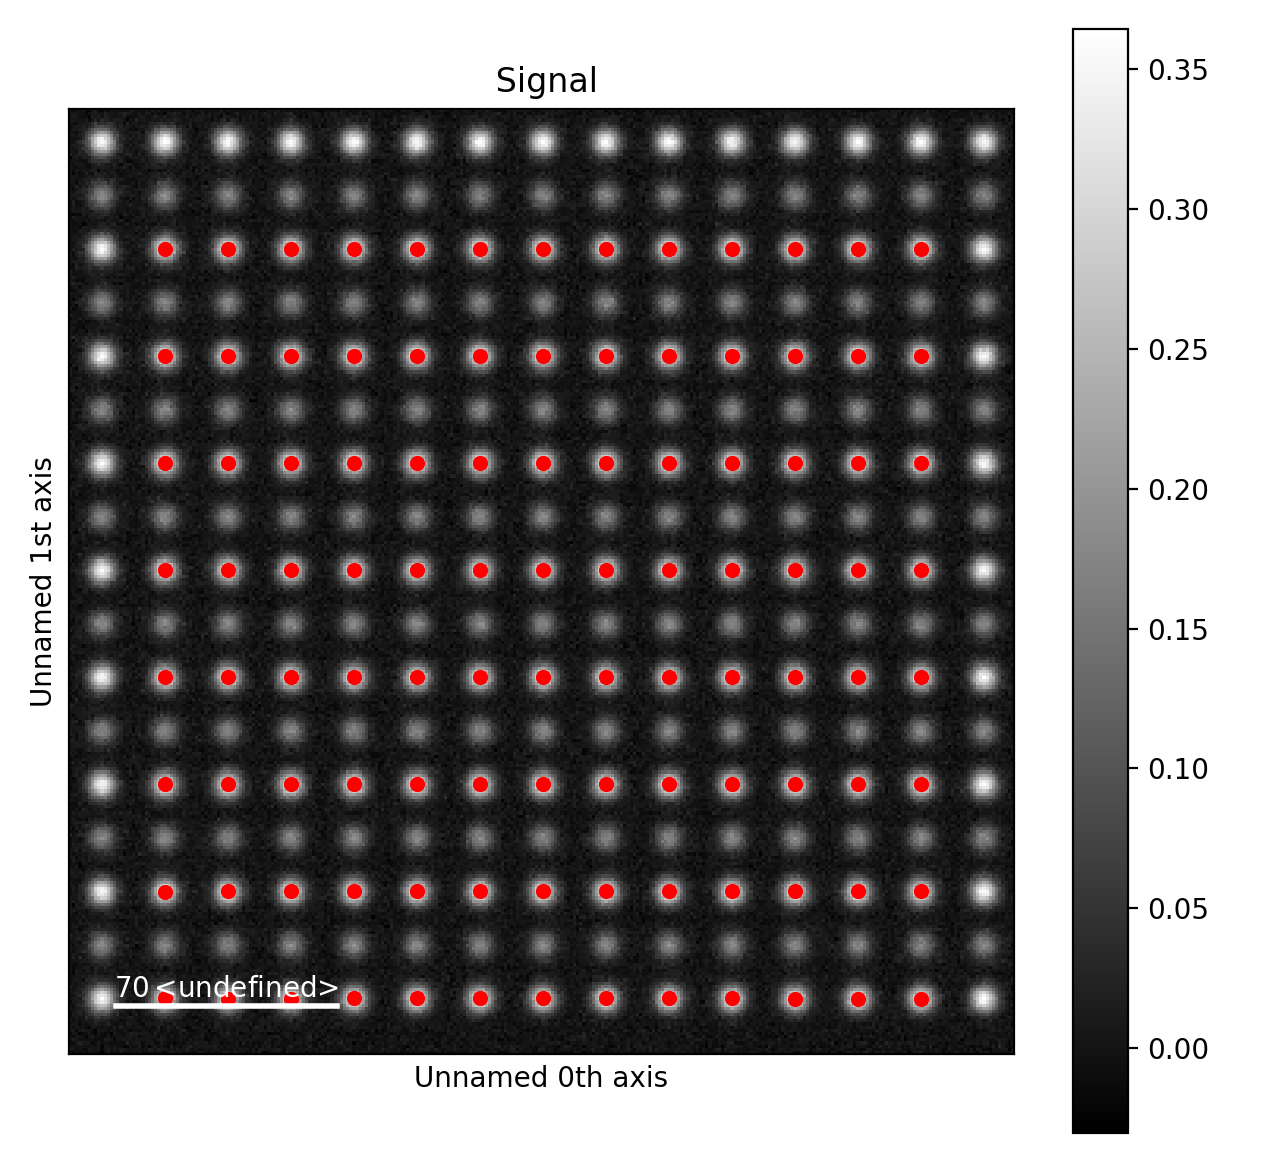

<IPython.core.display.Javascript object>


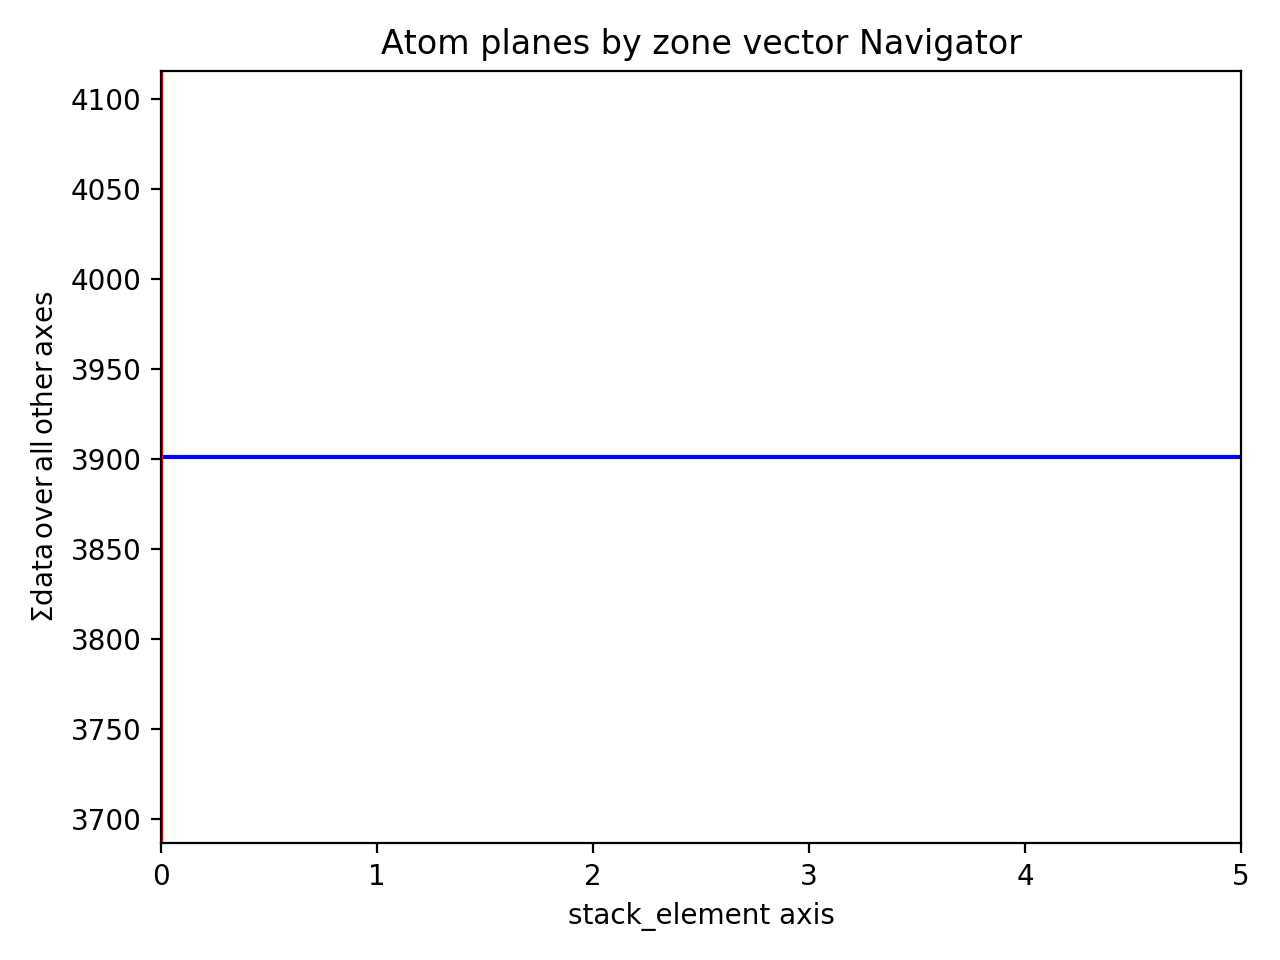

<IPython.core.display.Javascript object>


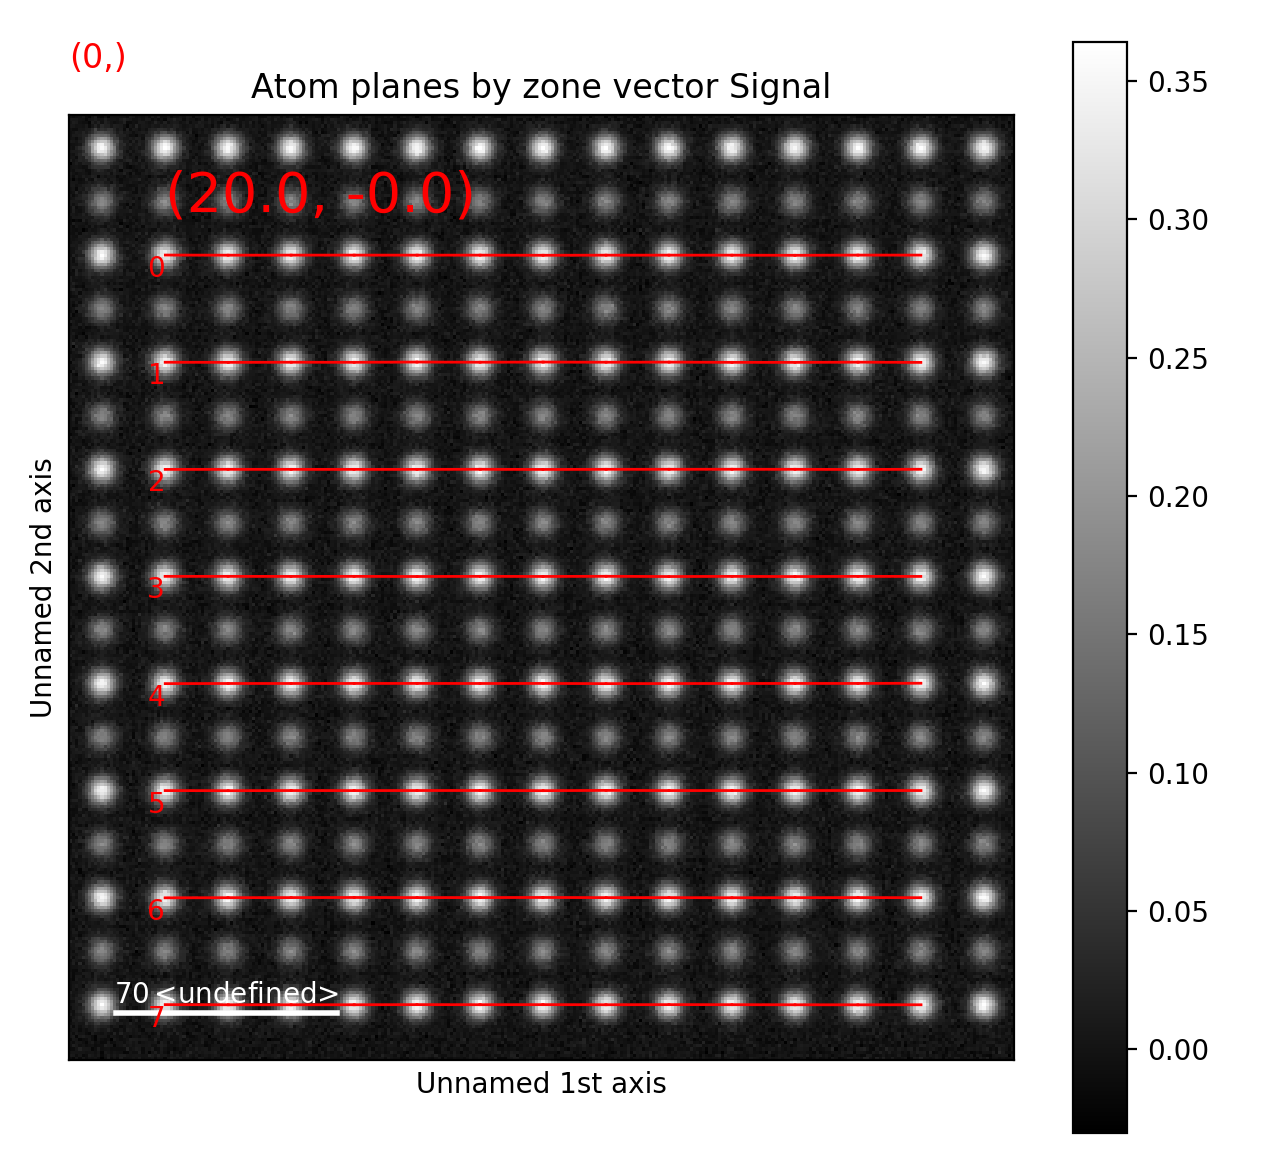

In [23]:
>>> s = dummy_data.get_two_sublattice_signal()
>>> A_positions = am.get_atom_positions(s, separation=15)
>>> sublattice_A = am.Sublattice(A_positions, image=s.data, color='r')
>>> sublattice_A.find_nearest_neighbors()
>>> sublattice_A.refine_atom_positions_using_center_of_mass()
>>> sublattice_A.refine_atom_positions_using_2d_gaussian()
>>> sublattice_A.construct_zone_axes()
>>> sublattice_A.plot()
>>> sublattice_A.plot_planes()

In [24]:
>>> zone_axis_001 = sublattice_A.zones_axis_average_distances[1]
>>> B_positions = sublattice_A.find_missing_atoms_from_zone_vector(zone_axis_001)

In [25]:
>>> from atomap.tools import remove_atoms_from_image_using_2d_gaussian
>>> image_without_A = remove_atoms_from_image_using_2d_gaussian(sublattice_A.image, sublattice_A)

Subtracting atoms: 100%|██████████| 104/104 [00:02<00:00, 44.15it/s]


In [26]:
>>> sublattice_B = am.Sublattice(B_positions, image_without_A, color='blue')
>>> sublattice_B.construct_zone_axes()
>>> sublattice_B.refine_atom_positions_using_center_of_mass()
>>> sublattice_B.refine_atom_positions_using_2d_gaussian()

Gaussian fitting: 100%|██████████| 91/91 [00:01<00:00, 47.73it/s]


<IPython.core.display.Javascript object>


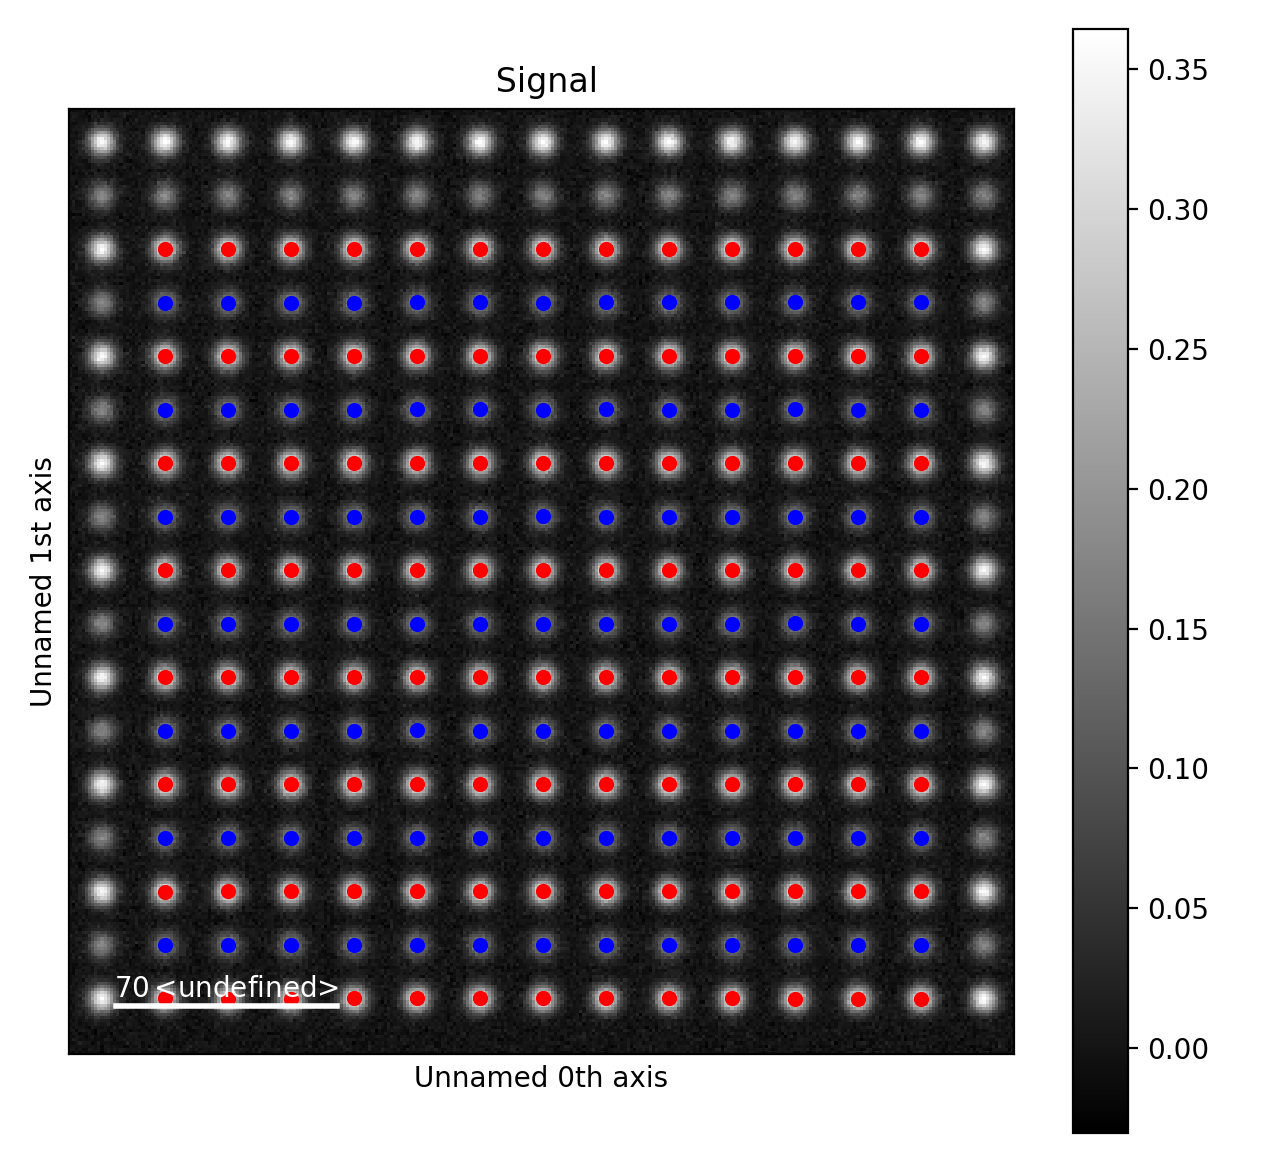

In [27]:
>>> atom_lattice = am.Atom_Lattice(image=s.data, name='test', sublattice_list=[sublattice_A, sublattice_B])
>>> atom_lattice.plot()

In [30]:
>>> zone = sublattice_A.zones_axis_average_distances[1]
>>> plane = sublattice_A.atom_planes_by_zone_vector[zone][7]
>>> s_elli_line = sublattice_A.get_ellipticity_line_profile(plane)

In [31]:
>>> position = s_elli_line.metadata.line_profile_data.x_list
>>> ellipticity = s_elli_line.metadata.line_profile_data.y_list
>>> standard_deviation = s_elli_line.metadata.line_profile_data.std_list

<IPython.core.display.Javascript object>


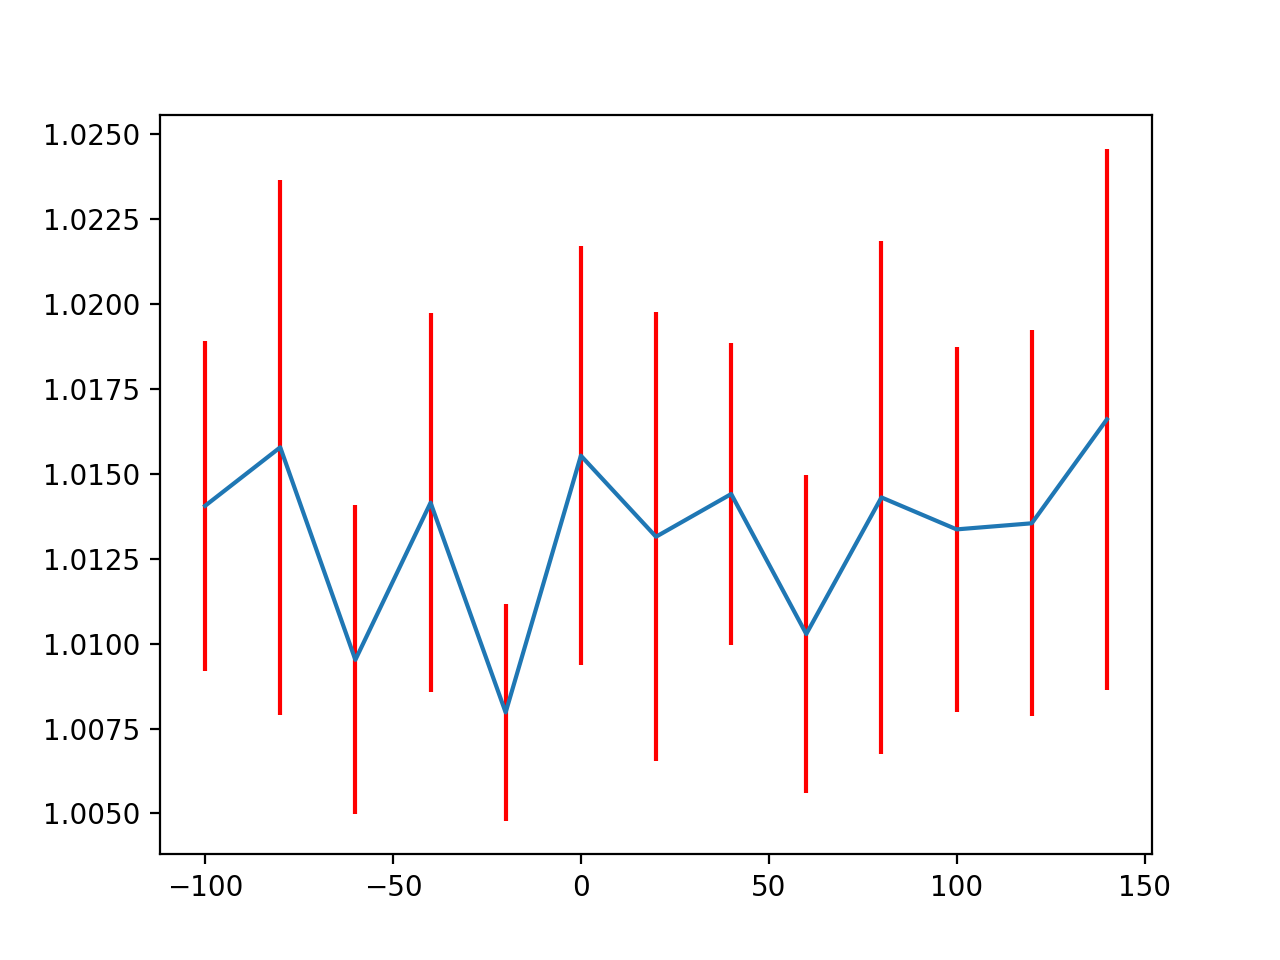

In [32]:
>>> import matplotlib.pyplot as plt
>>> fig, ax = plt.subplots()
>>> _ = ax.errorbar(position, ellipticity, yerr=standard_deviation, ecolor='red')
>>> fig.show()

In [33]:
>>> zone = sublattice_B.zones_axis_average_distances[1]
>>> plane = sublattice_B.atom_planes_by_zone_vector[zone][0]
>>> s_monolayer_line = sublattice_B.get_monolayer_distance_line_profile(zone, plane)

In [34]:
>>> zone = sublattice_B.zones_axis_average_distances[1]
>>> plane = sublattice_B.atom_planes_by_zone_vector[zone][-1]
>>> s_dd_line = sublattice_B.get_atom_distance_difference_line_profile(zone, plane)